# Figure 2 - Characteristics of sex-biased alternative splicing.

This will need to become Figure 3.



## Figure 2a 
Percentage of X chromosomal genes showing inactivation, escape from inactivation, or variable escape [25]. 
Percentage is shown for the entire set of 631 investigated X chromosomal genes, as well as the subsets of 248 
genes with differential expression (DE) and 166 with at least one AS event. P-values were  derived with Fisher’s 
exact test comparing genes with DE or AS to the entire set of 631 genes.

We extracted lists of X chromosomal genes showing inactivation, escape from inactivation, or variable escape 
from Landscape of X chromosome inactivation across human tissues Tukiainen, Nature. 2017;550:244-248. 
We extracted data from Supplemental Table 2 of this article, and compared our list of significantly alternatively spliced genes with the
list of gene categories in the Tukiainen paper.
The table included data on 959 genes (PAR: 23 nonPAR: 936), and assigned them to the following categories:
escape: 94, inactive: 408, unknown: 362, variable: 95


TODO -- Code for Figure (Peter can do this if we have a list of AS genes!)

## Figure 2b `Sex-biased alternative splicing index for each chromosome.`

This plot is based upon a file 'SplicingIndex_chr.tsv' that was generated by xx program.   It is sorted
in decreasing order by index, and the size of the circle reflects XXXX.

## Loading dependencies

In [1]:
library(ggplot2)
Sys.setenv(TAR = "/bin/tar") # for gzfile

## Calculation of the Sex-Biased Splicing Index
The normalized sex-biased splicing index is defined as the number of statistically significant splicing events per 1000 exons in the chromosome.

The plot will post the ranked by splicing index on the y-axis by the chromosomes on the x-axis

In [58]:
# a code block
getwd()
dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/figure2_test_files/SplicingIndex_chr.tsv", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
dat

[1] "/mnt/shared/gcp-user/session_data/sbas/jupyter"

chr,n,ExonCounts,Index
<fct>,<int>,<int>,<dbl>
chrX,429,35309,12.149877
chr4,326,45520,7.161687
chr11,497,69915,7.108632
chr8,287,42730,6.716593
chr3,496,74562,6.652182
chr14,278,41897,6.635320
chr12,444,69686,6.371438
chr5,329,52715,6.241108
chr22,159,26063,6.100602


In [3]:
# sort by index
res_sorted <- dat[order(dat$Index, decreasing=TRUE),]
res_sorted

,chr,n,ExonCounts,Index
,<fct>,<int>,<int>,<dbl>
1,chrX,429,35309,12.149877
2,chr4,326,45520,7.161687
3,chr11,497,69915,7.108632
4,chr8,287,42730,6.716593
5,chr3,496,74562,6.652182
6,chr14,278,41897,6.635320
7,chr12,444,69686,6.371438
8,chr5,329,52715,6.241108
9,chr22,159,26063,6.100602


In [4]:
# though we read in the `tsv` file with stringsAsFactors = true, lets ensure this is the case
res_sorted$chr <- factor(res_sorted$chr, levels = res_sorted$chr)

In [5]:
# set the colors
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.5)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)

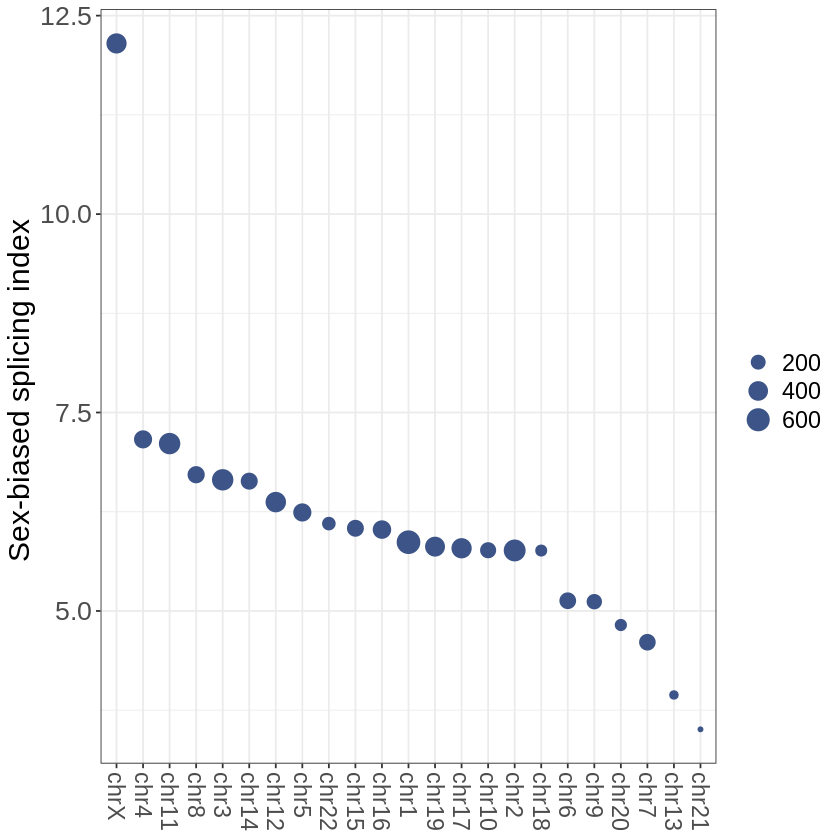

In [6]:
# make the plot 
figure2b <- ggplot(res_sorted, aes(x = chr, y = Index, size = n)) +
  geom_point(color=npgBlue) +
  theme_bw() +
  theme(axis.text.x = element_text(size=14, angle = 270, hjust = 0.0, vjust = 0.5),
	axis.text.y = element_text(size=16),
	axis.title.x = element_blank(),
	axis.title.y = element_text(face="plain", colour="black",
                                    size=18),
	legend.title=element_blank(),
	legend.text = element_text(face="plain", colour="black",
                                   size=14)) +
  scale_fill_viridis_c() +
  ylab(paste("Sex-biased splicing index ")) +
  xlab("Chromosomes") +
  guides(size = guide_legend(title = "Number of ASE"))
figure2b


In [7]:
## save as a pdf
pdf ("../pdf/figure2b.pdf")
figure2b
dev.off()

png 
  2

## Figure 2c - Proportions of AS events that were strictly tissue specific, present in 2-5, or over 5 tissues

## Loading dependencies

In [8]:
library(ggplot2)
Sys.setenv(TAR = "/bin/tar") # for gzfile

Read in the file `genesWithCommonAs.tsv` containing number of splicing events per gene and number of tissues.

In [9]:

dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/figure2_test_files/genesWithCommonAS.tsv", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
head(dat)

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,KDM6A,41,22
2,DDX3X,35,10
3,ZFX,33,19
4,XIST,32,29
5,KDM5C,23,19
6,SORBS2,22,4


## Getting Proportions
Making a table of the number of tissues per gene will get us the 
numbers we need for the proportions of alternative splicing events (AS) 
that are strictly tissue specific

In [10]:
tissue_specificity_cnt <- table(dat$Tissues)
tissue_specificity_cnt


   1    2    3    4    6    8    9   10   14   19   22   29 
3273  411   40    8    1    1    1    1    1    2    1    1 

### Make an Array of the table
Make an array of the table to access the values based upon the index

In [11]:
a <- unclass(tissue_specificity_cnt)
a

1    2    3    4    6    8    9   10   14   19   22   29 
3273  411   40    8    1    1    1    1    1    2    1    1

####  Names for logic

Using the names of this array contain the numbers of genes
with those number of splicing events, which we then can use for logical reasoning, such as number of genes that have tissue specific splicing events.  The length of this vector is equal to the length of the array.
Using this logical value within the array will allow us to sum the events for our figure.

In [12]:
tissue_cnts <- as.numeric(unclass(names(a)))
tissue_cnts == 1
a[tissue_cnts == 1]
low_cnt <- sum(as.numeric(a[tissue_cnts == 1]))
low_cnt

[1]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

1 
3273

[1] 3273

In [13]:
a[tissue_cnts > 1 & tissue_cnts < 6]
medium_cnt <- sum(as.numeric(a[tissue_cnts > 1 & tissue_cnts < 6]))
medium_cnt

2   3   4 
411  40   8

[1] 459

In [14]:
a[tissue_cnts > 4]
high_cnt <- sum(as.numeric(a[tissue_cnts > 4]))
high_cnt

6  8  9 10 14 19 22 29 
 1  1  1  1  1  2  1  1

[1] 9

In [15]:
## set the colors
npgBlue<- rgb(60/256,84/256,136/256,1)
npgRed <- rgb(220/256,0,0,0.8)
npgGreen <- rgb(0,160/256,135/256,1)
npgBrown <- rgb(126/256,97/256,72/256,1)


Make the pie chart figure 2c illustrating number of genes that are spliced and present in only 1 tissue, 2-5 tissues and the number of genes that are alternatively spliced in greater than 5 tissues.

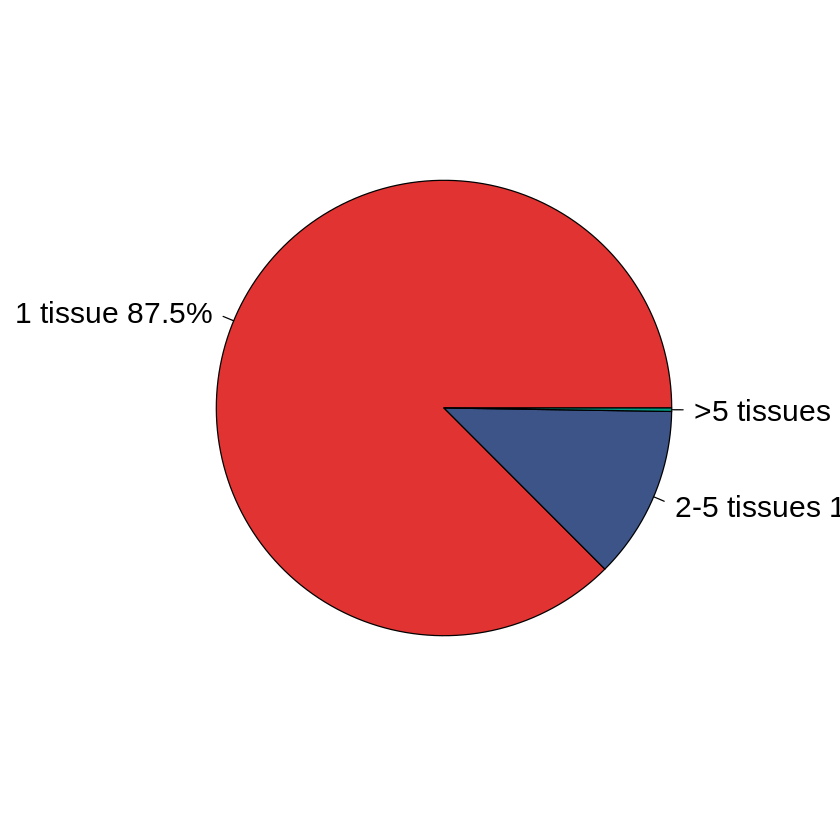

In [16]:
colrs <- c(npgRed,npgBlue,npgGreen)
slices <-c(low_cnt, medium_cnt, high_cnt)
lbls <-c("1 tissue","2-5 tissues",">5 tissues")
pct <- round(slices/sum(slices)*100, digits=1)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=colrs,main="",cex=1.5,xaxs="r",yaxs="r")

In [17]:
pdf ("../pdf/figure2c.pdf")
pie(slices,labels = lbls, col=colrs,main="",cex=1.5,xaxs="r",yaxs="r")
dev.off()

png 
  2

## Figure 2d - Genes with over 10 significant sex-biased AS events.

PREVIOUS VERSION Most of the AS events were specific to one tissue, but slightly over 12% were found in 2-5 tissues, with only 9 AS events being found in more than 5 tissues (Fig. 2c). 27 genes were found to have >10 AS events (Fig. 2d). 

-- We basically need to count the number of tissues per AS event (Figure 2c) and the number of AS events per gene (FIgure 2d)



The colour coding represents the number of affected tissues, sorted in decreasing order by the number of sex-biased splicing events per gene.

## Loading dependencies

According to installation instructions here https://github.com/tidyverse/dplyr it is recommended to just install the whole tidyverse.

In [52]:
library(tidyverse)
library(ggplot2)
library(magrittr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.4
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘readr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.2”Warning message:
“package ‘stringr’ was built under R version 3.6.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()


Read in the output of the XX script.

In [19]:
dat <- read.table(file ="https://github.com/adeslatt/sbas_test/releases/download/figure2_test_files/genesWithCommonAs.tsv",
                sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(dat)
dim(dat)

,GeneSymbol,n,Tissues
,<chr>,<int>,<int>
1,KDM6A,41,22
2,DDX3X,35,10
3,ZFX,33,19
4,XIST,32,29
5,KDM5C,23,19
6,SORBS2,22,4


[1] 3741    3

Remove all genes that have less than 10 splicing events.

In [20]:
res <- dat[dat$n > 10,]
head(res)
dim(res)

,GeneSymbol,n,Tissues
,<chr>,<int>,<int>
1,KDM6A,41,22
2,DDX3X,35,10
3,ZFX,33,19
4,XIST,32,29
5,KDM5C,23,19
6,SORBS2,22,4


[1] 27  3

Arrange the data in descending order in terms of the number of splicing events per gene

In [21]:
res <- res[order(res$n, decreasing=TRUE),]
head(res)

,GeneSymbol,n,Tissues
,<chr>,<int>,<int>
1,KDM6A,41,22
2,DDX3X,35,10
3,ZFX,33,19
4,XIST,32,29
5,KDM5C,23,19
6,SORBS2,22,4


Make sure the GeneSymbols are treated as factors, to ease the plotting.


In [22]:
res$GeneSymbol <- factor(res$GeneSymbol, levels = res$GeneSymbol)

Now make the plot, using viridis to fill the dots according to the amount of splicing per tissue.  The number of splicing events per gene does not necessarily correlate with the number of tissues that gene is involved with splicing.  Fewer tissues, more splicing events, mean that within a tissue there are more splicing events.  More Tissues and fewer splicing events for that gene indicates a level of tissue specificity with the splicing.

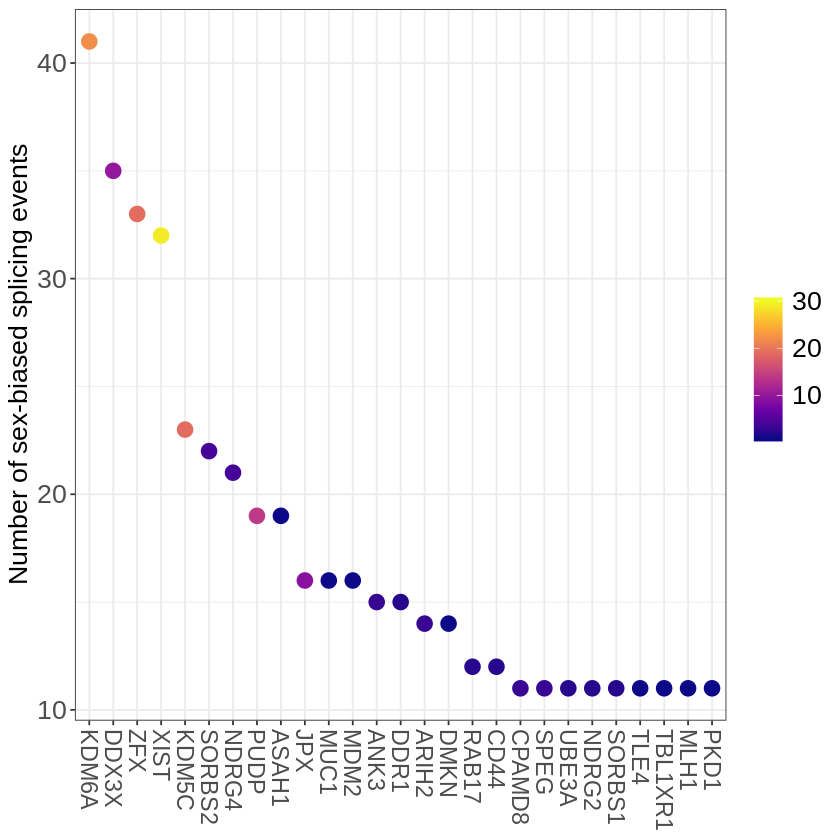

In [23]:
p<-ggplot(res, aes(x = GeneSymbol, y = n)) +
  geom_point(size = 4, aes(fill = Tissues, color = Tissues)) +
  theme_bw() +
  theme(axis.text.x = element_text(size=14, angle = 270, hjust = 0.0, vjust = 0.5),
        axis.text.y = element_text(size=16),
        axis.title.x = element_blank(),
        axis.title.y = element_text(face="plain", colour="black", 
                                    size=16),
        legend.title=element_blank(),
        legend.text = element_text(face="plain", colour="black", 
                                   size=16)) +
  scale_fill_viridis_c(aesthetics = c("colour", "fill"),
                       option = "plasma",
                       limits = c(1, 30), breaks = c(10, 20, 30)) +
  ylab(paste("Number of sex-biased splicing events"))

p


Save the figure to the pdf directory

In [24]:
ggsave(file = "../pdf/Figure2d.pdf", plot = p)

Saving 6.67 x 6.67 in image


## Figure 2e - Genes with over 10 significant sex-biased AS events.

The colour coding represents the number of affected tissues, sorted in decreasing order by the number of sex-biased splicing events per gene.

## Loading dependencies

In [36]:
library(viridis)
library(ggplot2)
library(magrittr)
Sys.setenv(TAR = "/bin/tar") # for gzfile

## Reading the Significant Splicing Events by Tissue Results

Starting with the output from running xx script, this file that summarizes the significant splicing events by tissue is then limited to only those tissues that have greater than 10 splicing events, and then the distribution of the 5 splicing events, A3SS, A5SS, RI, SE, and MXE as a percentage of the whole are compared between the tissues.

In [37]:
df <- read.table(file ="https://github.com/adeslatt/sbas_test/releases/download/figure2_test_files/Significant_events.tsv",
                sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(df)

,Tissue,ASE,Counts
,<chr>,<chr>,<int>
1,Adipose - Subcutaneous,A3SS,2
2,Adipose - Subcutaneous,A5SS,4
3,Adipose - Subcutaneous,MXE,0
4,Adipose - Subcutaneous,RI,2
5,Adipose - Subcutaneous,SE,44
6,Adipose - Visceral (Omentum),A3SS,2


Another file, which created simplifying labels is read in as well.   It is produced by XX script.

In [38]:
totals <- read.table("https://github.com/adeslatt/sbas_test/releases/download/figure2e_test_file/Totals_by_tissue_annotated.txt", 
                     sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(totals)

,Tissue,Total,Label
,<chr>,<int>,<chr>
1,Adipose - Subcutaneous,52,Adipose (S)
2,Adipose - Visceral (Omentum),9,Adipose (V)
3,Adrenal Gland,147,Adrenal Glad
4,Artery - Aorta,31,Aorta
5,Artery - Coronary,6,Coronary Artery
6,Artery - Tibial,21,Tibial Artery


Using the summarizing label, where the tissues match, annotated, to summarized output, we provide the annotation label.  This will help us make the figure with cleaner labels.

In [39]:
idx <- match(df$Tissue, totals$Tissue)
df$Label <- totals$Label[idx]
df$Label <- factor(df$Label, levels = totals$Label)

dim(df)
dim(totals)
head(df)

[1] 185   4

[1] 37  3

,Tissue,ASE,Counts,Label
,<chr>,<chr>,<int>,<fct>
1,Adipose - Subcutaneous,A3SS,2,Adipose (S)
2,Adipose - Subcutaneous,A5SS,4,Adipose (S)
3,Adipose - Subcutaneous,MXE,0,Adipose (S)
4,Adipose - Subcutaneous,RI,2,Adipose (S)
5,Adipose - Subcutaneous,SE,44,Adipose (S)
6,Adipose - Visceral (Omentum),A3SS,2,Adipose (V)


Just as a check, lets ensure that the total splicing events has not been altered.

In [40]:
sum(df$Counts)
sum(totals$Total)


[1] 7222

[1] 7222

What is the distribution of the one file with annotation for the various counts of splicing events.

In [41]:
table(totals$Total)


   0    1    2    3    4    5    6    8    9   11   12   16   18   21   26   30 
   2    2    2    4    2    2    2    3    2    1    1    1    1    1    1    1 
  31   44   52   76  147  377 2072 4168 
   2    1    1    1    1    1    1    1 

One might expect greater granularity in the significant events file, that is not summarized, and as expected, the totals are lower as they are not summarized by tissue, but still broken out by each of the splicing events, which we want to preserve for this figure.

In [42]:
table(df$Counts)


   0    1    2    3    4    5    7    8   11   13   16   18   20   21   25   34 
  70   34   29   12   10    4    3    1    1    1    2    1    1    1    1    1 
  44   56   58   70  130  136  143  156  176  333  369 1541 3619 
   1    1    1    1    1    1    1    1    1    1    1    1    1 

We are limiting the figure to only those tissues that have greater than ten splicing events.

In [43]:
tissues_keep <- totals[totals$Total > 10,]
head(tissues_keep)

,Tissue,Total,Label
,<chr>,<int>,<chr>
1,Adipose - Subcutaneous,52,Adipose (S)
3,Adrenal Gland,147,Adrenal Glad
4,Artery - Aorta,31,Aorta
6,Artery - Tibial,21,Tibial Artery
9,Brain - Caudate (basal ganglia).Brain - Nucleus accumbens (basal ganglia).Brain - Putamen (basal ganglia),11,Basal Ganglia
10,Brain - Cerebellum.Brain - Cerebellar Hemisphere,18,Cerebellum


In [44]:
df_plot <- data.frame()


This is a bit of a sanity check, before the loop is run, to see that the summary label works as we would like.  What we expect to see here is the same label on the far right for each of the alternative splicing events.  Looks good!

In [45]:
df_tissue <- df[(df$Label %in% totals$Label[1]),]

In [46]:
df_tissue

,Tissue,ASE,Counts,Label
,<chr>,<chr>,<int>,<fct>
1,Adipose - Subcutaneous,A3SS,2,Adipose (S)
2,Adipose - Subcutaneous,A5SS,4,Adipose (S)
3,Adipose - Subcutaneous,MXE,0,Adipose (S)
4,Adipose - Subcutaneous,RI,2,Adipose (S)
5,Adipose - Subcutaneous,SE,44,Adipose (S)


In [47]:
total_df_counts <- sum(df$Counts)
total_df_counts

[1] 7222

Another check, before we go for the loop, to make sure all is clean -- probably not necessary to break out each of the alternative splicing events separately, but it keeps ones mind clear on these events.

In [48]:
length(totals$Label)
length(tissues_keep$Label)
tissue_splicing_events = sum(df$Counts[(df$ASE=='A3SS' | 
               df$ASE=='A5SS' |
               df$ASE=='RI'   |
               df$ASE=='MXE'  |
               df$ASE=='SE'   ) & df$Label == tissues_keep$Label[1]])

tissue_splicing_events
all_splicing_events = sum(tissues_keep$Total)
all_splicing_events
percentage <- tissue_splicing_events/all_splicing_events*100
percentage

[1] 37

[1] 16

[1] 52

[1] 7132

[1] 0.7291082

In [49]:
total_splicing_events = sum (tissues_keep$Total)
total_splicing_events


[1] 7132

Now, we create a new data frame (df_plot), which contains the label, as well as the percentages.   This will be our data for our plot.

In [50]:
df_plot <- data.frame()
for (i in 1:length(tissues_keep$Label)) {
    tissue_splicing_events = sum(df$Counts[(df$ASE=='A3SS' | 
                                          df$ASE=='A5SS' |
                                          df$ASE=='RI'   |
                                          df$ASE=='MXE'  |
                                          df$ASE=='SE'   ) 
                                        & df$Label == tissues_keep$Label[i]])
    
    df_tissue      <- df[(df$Label %in% tissues_keep$Label[i]),]
    df_tissue$Perc <- (df_tissue$Counts / tissue_splicing_events) * 100
    if (i == 1)
        df_plot <- df_tissue
    else
        df_plot <- rbind(df_plot, df_tissue)
}  
dim(df_plot)
head(df_plot)

[1] 80  5

,Tissue,ASE,Counts,Label,Perc
,<chr>,<chr>,<int>,<fct>,<dbl>
1,Adipose - Subcutaneous,A3SS,2,Adipose (S),3.846154
2,Adipose - Subcutaneous,A5SS,4,Adipose (S),7.692308
3,Adipose - Subcutaneous,MXE,0,Adipose (S),0.000000
4,Adipose - Subcutaneous,RI,2,Adipose (S),3.846154
5,Adipose - Subcutaneous,SE,44,Adipose (S),84.615385
11,Adrenal Gland,A3SS,2,Adrenal Glad,1.360544


Now, we make our plot, it will be collored by the proportion of each splicing event for each of the tissues that have greater than 10 splicing events.   

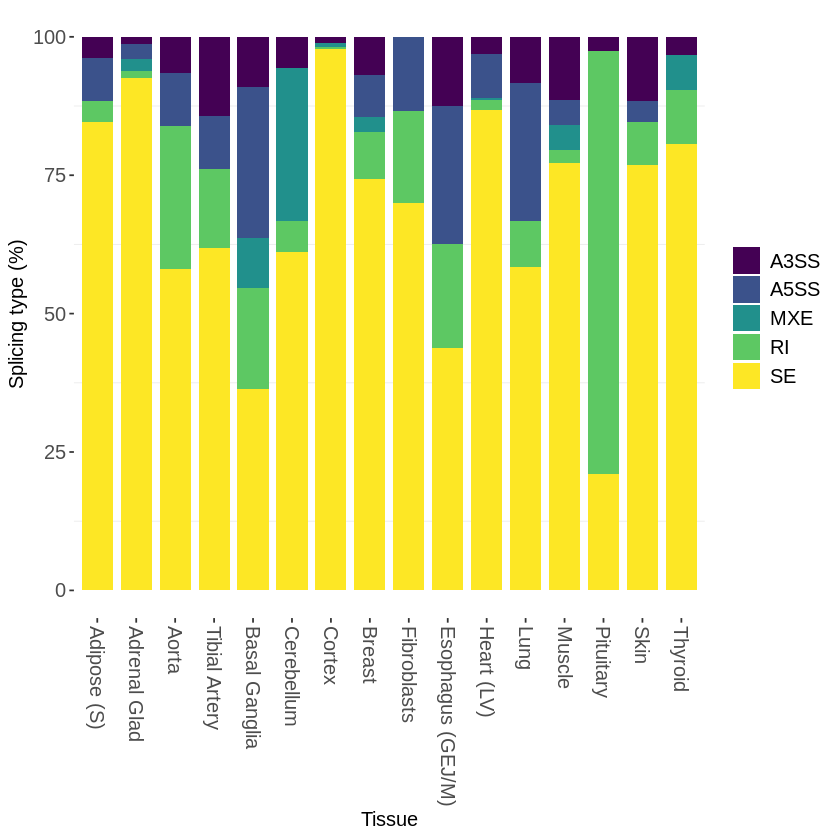

In [51]:
p<-ggplot(df_plot, 
       aes(x=Label, y=Perc, fill = ASE, by = Tissue)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Tissue")
p

In [43]:
ggsave(file = "../pdf/Figure2e.pdf", plot = p)

Saving 6.67 x 6.67 in image


## Figure 2extra - splicing by chromosome

Percentage is shown for the entire set of 631 investigated X chromosomal genes, as well as the subsets of 248 genes with differential expression (DE) and 166 with at least one AS event. P-values were derived with Fisher’s exact test comparing genes with DE or AS to the entire set of 631 genes

### Loading dependencies

In [8]:

library(viridis)
library(ggplot2)
library(magrittr)
Sys.setenv(TAR = "/bin/tar") # for gzfile

Warning message:
“package ‘viridis’ was built under R version 3.6.3”Loading required package: viridisLite
Warning message:
“package ‘viridisLite’ was built under R version 3.6.3”Warning message:
“package ‘magrittr’ was built under R version 3.6.3”

### Read in the rMATS results for parsing the gencode or other GTF

rMATS 3.2.5 parses the annotation file, gencode v.30 in this example, and creates the SE, RI, MXE, A3SS, A5SS events.

In [9]:
# a code block
getwd()
fromGTFSE.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.SE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFSE.dat$AStype <- 'SE'
fromGTFRI.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.RI.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFRI.dat$AStype <- 'RI'
fromGTFMXE.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.MXE.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFMXE.dat$AStype <- 'MXE'
fromGTFA5SS.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.A5SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA5SS.dat$AStype <- 'A5SS'
fromGTFA3SS.dat <- read.table("https://github.com/adeslatt/sbas_test/releases/download/rmats_final.gencode.v30/fromGTF.A3SS.txt", 
                  stringsAsFactors = TRUE,
                  header=TRUE)
fromGTFA3SS.dat$AStype <- 'A3SS'

head(fromGTFSE.dat)
head(fromGTFMXE.dat)
head(fromGTFRI.dat)
head(fromGTFA3SS.dat)
head(fromGTFA5SS.dat)

[1] "/mnt/shared/gcp-user/session_data/sbas/jupyter"

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000034152.18,MAP2K3,chr17,+,21287990,21288091,21284709,21284969,21295674,21295769,SE
2,2,ENSG00000034152.18,MAP2K3,chr17,+,21303182,21303234,21302142,21302259,21304425,21304553,SE
3,3,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21287990,21288091,21296085,21296143,SE
4,4,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21287990,21288091,21298412,21298479,SE
5,5,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21284710,21284969,21296085,21296143,SE
6,6,ENSG00000034152.18,MAP2K3,chr17,+,21295674,21295769,21284710,21284969,21298412,21298479,SE


,ID,GeneID,geneSymbol,chr,strand,X1stExonStart_0base,X1stExonEnd,X2ndExonStart_0base,X2ndExonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000114062.19,UBE3A,chr15,-,25407066,25407262,25408619,25408684,25405460,25405502,25409087,25409207,MXE
2,2,ENSG00000181790.11,ADGRB1,chr8,+,142524237,142524304,142526541,142526627,142522640,142522710,142533294,142533466,MXE
3,3,ENSG00000159256.13,MORC3,chr21,+,36380230,36380318,36380625,36380682,36377409,36377507,36384729,36384829,MXE
4,4,ENSG00000077232.18,DNAJC10,chr2,+,182752548,182752623,182754702,182754805,182752071,182752188,182755002,182755104,MXE
5,5,ENSG00000149809.14,TM7SF2,chr11,+,65113219,65113414,65113490,65113594,65112810,65112865,65114712,65114832,MXE
6,6,ENSG00000149809.14,TM7SF2,chr11,+,65112810,65112865,65113219,65113414,65112514,65112711,65113490,65113594,MXE


,ID,GeneID,geneSymbol,chr,strand,riExonStart_0base,riExonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000160223.17,ICOSLG,chr21,-,44226833,44230089,44226833,44229044,44230053,44230089,RI
2,2,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230933,161231116,161231245,RI
3,3,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230918,161231116,161231245,RI
4,4,ENSG00000114062.19,UBE3A,chr15,-,25333727,25340228,25333727,25339257,25340084,25340228,RI
5,5,ENSG00000100359.21,SGSM3,chr22,+,40408932,40409372,40408932,40409018,40409249,40409372,RI
6,6,ENSG00000100359.21,SGSM3,chr22,+,40408932,40409372,40408932,40409018,40409339,40409372,RI


,ID,GeneID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000034152.18,MAP2K3,chr17,+,21300470,21300658,21300544,21300658,21298877,21298926,A3SS
2,2,ENSG00000160223.17,ICOSLG,chr21,-,44222990,44229044,44222990,44223078,44230053,44230089,A3SS
3,3,ENSG00000143257.11,NR1I3,chr1,-,161230812,161230933,161230812,161230918,161231116,161231245,A3SS
4,4,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230918,161231328,161231474,A3SS
5,5,ENSG00000143257.11,NR1I3,chr1,-,161230812,161230933,161230812,161230918,161231328,161231474,A3SS
6,6,ENSG00000143257.11,NR1I3,chr1,-,161230812,161231245,161230812,161230933,161231328,161231474,A3SS


,ID,GeneID,geneSymbol,chr,strand,longExonStart_0base,longExonEnd,shortES,shortEE,flankingES,flankingEE,AStype
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,ENSG00000125166.13,GOT2,chr16,-,58722118,58722278,58722149,58722278,58719195,58719255,A5SS
2,2,ENSG00000130182.8,ZSCAN10,chr16,-,3092541,3093004,3092676,3093004,3091763,3091828,A5SS
3,3,ENSG00000143257.11,NR1I3,chr1,-,161236458,161236598,161236529,161236598,161235846,161235977,A5SS
4,4,ENSG00000154265.16,ABCA5,chr17,-,69273942,69274128,69273958,69274128,69271161,69271289,A5SS
5,5,ENSG00000035928.16,RFC1,chr4,-,39351347,39351476,39351431,39351476,39345400,39345476,A5SS
6,6,ENSG00000127249.15,ATP13A4,chr3,-,193440489,193440637,193440557,193440637,193439022,193439065,A5SS


In [11]:
summaryAS.df <- rbind(fromGTFSE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFRI.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFMXE.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA5SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")],
                      fromGTFA3SS.dat[,c("ID","GeneID","geneSymbol","chr","strand","AStype")])

In [21]:
chr_specific_splicing_SE <- table(summaryAS.df$chr[summaryAS.df$AStype == "SE"])
a_chr_SE <- unclass(chr_specific_splicing_SE)
# a_chr_SE
chr_specific_splicing_RI <- table(summaryAS.df$chr[summaryAS.df$AStype == "RI"])
a_chr_RI <- unclass(chr_specific_splicing_RI)
# a_chr_RI
chr_specific_splicing_MXE <- table(summaryAS.df$chr[summaryAS.df$AStype == "MXE"])
a_chr_MXE <- unclass(chr_specific_splicing_MXE)
# a_chr_MXE
chr_specific_splicing_A3SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A3SS"])
a_chr_A3SS <- unclass(chr_specific_splicing_A3SS)
#a_chr_A3SS
chr_specific_splicing_A5SS <- table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
a_chr_A5SS <- unclass(chr_specific_splicing_A5SS)
print("A5SS (other examples commented out):")
table(summaryAS.df$chr[summaryAS.df$AStype == "A5SS"])
#a_chr_A5SS

[1] "A5SS (other examples commented out):"



 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
  496   155   386   354    59   212   188   348   410    74   400   387   135 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrX  chrY 
   60   129   368   184   210   216   284   166   162   191    10 

In [23]:
chr_splicing_dist <- rbind(cbind(data.matrix(a_chr_SE),   chr=names(a_chr_SE),  AStype = "SE"),
                           cbind(data.matrix(a_chr_RI),   chr=names(a_chr_RI),  AStype = "RI"),
                           cbind(data.matrix(a_chr_MXE),  chr=names(a_chr_MXE), AStype = "MXE"),
                           cbind(data.matrix(a_chr_A3SS), chr=names(a_chr_A3SS),AStype = "A3SS"),
                           cbind(data.matrix(a_chr_A5SS), chr=names(a_chr_A5SS),AStype = "A5SS"))
colnames(chr_splicing_dist)=c("Counts","Chr","AStype")
counts <- chr_splicing_dist[,"Counts"]
chr_splicing_df <- data.frame(chr_splicing_dist)
head(chr_splicing_df)
chr_splicing_df$Counts <- as.integer(counts)
head(chr_splicing_df)
head(chr_splicing_df$Counts)

,Counts,Chr,AStype
,<fct>,<fct>,<fct>
chr1,3812,chr1,SE
chr10,1458,chr10,SE
chr11,2541,chr11,SE
chr12,2540,chr12,SE
chr13,663,chr13,SE
chr14,1551,chr14,SE


,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr10,1458,chr10,SE
chr11,2541,chr11,SE
chr12,2540,chr12,SE
chr13,663,chr13,SE
chr14,1551,chr14,SE


[1] 3812 1458 2541 2540  663 1551

In [24]:
dim(chr_splicing_dist)

[1] 120   3

In [25]:
chromosomes <- names(a_chr_SE)
chromosomes <- chromosomes[order(chromosomes)]
chromosomes

[1] "chr1"  "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17"
[10] "chr18" "chr19" "chr2"  "chr20" "chr21" "chr22" "chr3"  "chr4"  "chr5" 
[19] "chr6"  "chr7"  "chr8"  "chr9"  "chrX"  "chrY"

In [26]:
colnames(chr_splicing_dist)

[1] "Counts" "Chr"    "AStype"

In [27]:
chr_splicing_df[chr_splicing_df$Chr==chromosomes[1],]

,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr1.1,604,chr1,RI
chr1.2,286,chr1,MXE
chr1.3,862,chr1,A3SS
chr1.4,496,chr1,A5SS


In [30]:
#chr_splicing_df$Chr
sum(chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],"Counts"])

[1] 6060

In [31]:
df_chromosome     <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[1],]
df_chromosome

,Counts,Chr,AStype
,<int>,<fct>,<fct>
chr1,3812,chr1,SE
chr1.1,604,chr1,RI
chr1.2,286,chr1,MXE
chr1.3,862,chr1,A3SS
chr1.4,496,chr1,A5SS


In [32]:
percentage <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
percentage

[1] 62.904290  9.966997  4.719472 14.224422  8.184818

In [33]:
df_plot <- data.frame()

for (i in 1:length(chromosomes)) {
    df_chromosome  <- chr_splicing_df[chr_splicing_df$Chr ==chromosomes[i],]
    percentage     <- df_chromosome$Counts/sum(df_chromosome$Counts)*100
    final <- cbind(df_chromosome, Perc=percentage)
    if (i == 1)
        df_plot <- final 
    else
        df_plot <- rbind(df_plot, final)
}  

dim(df_plot)
head(df_plot)

[1] 120   4

,Counts,Chr,AStype,Perc
,<int>,<fct>,<fct>,<dbl>
chr1,3812,chr1,SE,62.904290
chr1.1,604,chr1,RI,9.966997
chr1.2,286,chr1,MXE,4.719472
chr1.3,862,chr1,A3SS,14.224422
chr1.4,496,chr1,A5SS,8.184818
chr10,1458,chr10,SE,70.096154


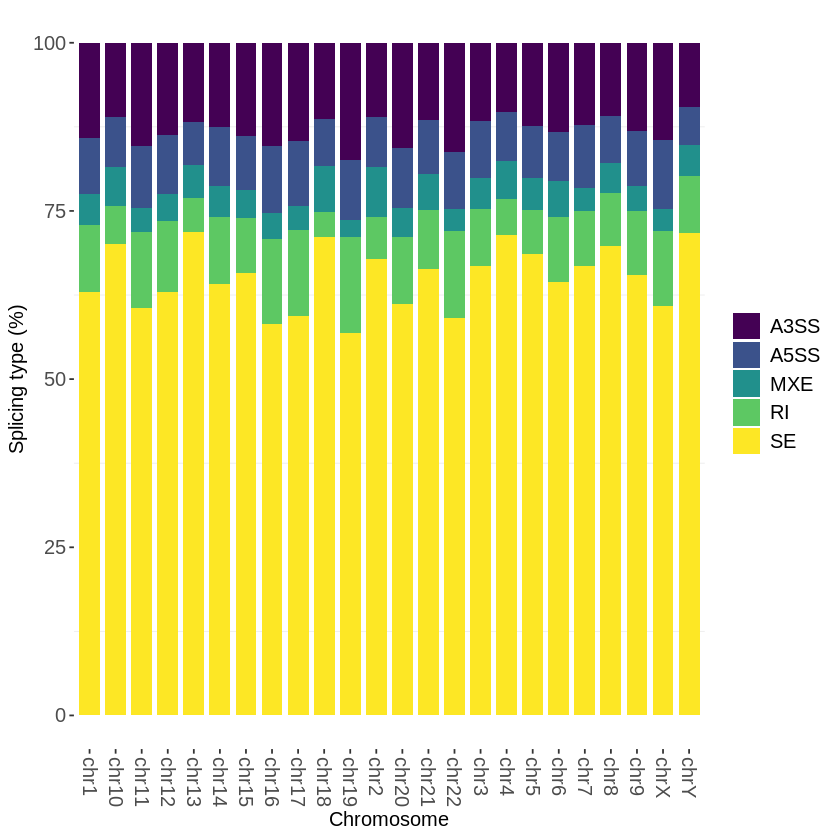

In [34]:
p<-ggplot(df_plot, 
       aes(x=Chr, y=Perc, fill = AStype, by = Chr)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Chromosome")
p

In [35]:
ggsave(file = "../pdf/figureSplicingByChromosome.pdf", plot = p)

Saving 6.67 x 6.67 in image


### Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'** (British spelling), files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [59]:
figure_id   = "Figure2"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

Generating sha256 checksums of the artefacts in the `..data/` directory .. 


character(0)

Done!



sha256sum,file
<chr>,<chr>
5146c849c9354129590c59da5e6040a074523b4827d0975e3f5fa43737af7e9a,README.md


### 2. Libraries metadata

In [60]:

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..
Done!

Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..
Done!



 setting  value                       
 version  R version 3.6.1 (2019-07-05)
 os       Ubuntu 18.04.3 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-03-05                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
dplyr,dplyr,0.8.4,0.8.4,/opt/conda/lib/R/library/dplyr,/opt/conda/lib/R/library/dplyr,TRUE,FALSE,2020-01-31,CRAN (R 3.6.2),NA,/opt/conda/lib/R/library
forcats,forcats,0.4.0,0.4.0,/opt/conda/lib/R/library/forcats,/opt/conda/lib/R/library/forcats,TRUE,FALSE,2019-02-17,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
ggplot2,ggplot2,3.2.1,3.2.1,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2019-08-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
magrittr,magrittr,1.5,1.5,/opt/conda/lib/R/library/magrittr,/opt/conda/lib/R/library/magrittr,TRUE,FALSE,2014-11-22,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
purrr,purrr,0.3.3,0.3.3,/opt/conda/lib/R/library/purrr,/opt/conda/lib/R/library/purrr,TRUE,FALSE,2019-10-18,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
readr,readr,1.3.1,1.3.1,/opt/conda/lib/R/library/readr,/opt/conda/lib/R/library/readr,TRUE,FALSE,2018-12-21,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
stringr,stringr,1.4.0,1.4.0,/opt/conda/lib/R/library/stringr,/opt/conda/lib/R/library/stringr,TRUE,FALSE,2019-02-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
tibble,tibble,2.1.3,2.1.3,/opt/conda/lib/R/library/tibble,/opt/conda/lib/R/library/tibble,TRUE,FALSE,2019-06-06,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
tidyr,tidyr,1.0.2,1.0.2,/opt/conda/lib/R/library/tidyr,/opt/conda/lib/R/library/tidyr,TRUE,FALSE,2020-01-24,CRAN (R 3.6.2),NA,/opt/conda/lib/R/library
